In [1]:
import numpy as np
from matplotlib import pyplot as plt

from ExpInvQuEST import QuEST

%matplotlib notebook

## Set up true eigenvalues, following the example in Ledoit-Wolf

In [2]:
p = 200
n = 500
r = p/n
z = np.linspace(0.0, 1.0, p)
z1 = z[z<=0.5]
exponent = 3
tau1 = 0.5 * (1.0 - (1.0 - (2.0 * z1) ** exponent) ** (1.0/exponent))
eigvals = 1.0 + 9.0 * np.concatenate([tau1, 1.0-tau1[::-1]])

tau = 1
gamma = np.sqrt((1/np.sinh(1/tau))+1)

true_eigvals = eigvals
true_eigvals.sort()

## Generate sample of noisy empirical eigenvalues

In [3]:
B = np.array([[np.exp(-np.abs(i-j)/(tau))
               for i in range(n)]
              for j in range(n)])

C = np.diag(np.sqrt(true_eigvals))

X = np.random.normal(size=(n, p))
A = 1.0/n * C.dot(X.T).dot(B).dot(X).dot(C)
empirical_eigvals = np.linalg.eigvalsh(A)
empirical_eigvals.sort()

## Determine outer edges of the support using empirical eigenvalues as a naive estimate

In [4]:
min_k, max_k = QuEST.edge(empirical_eigvals, r, gamma)
k = np.linspace(min_k, max_k, 500)
print(min_k, max_k)

0.07281309539389998 33.18648710935757


## Calculate and plot QuEST function and it's random-directional derivative w.r.t. input eigenvalues

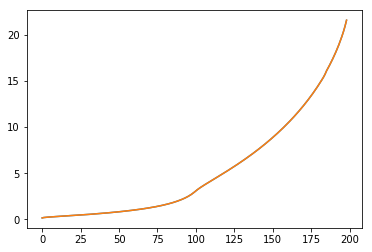

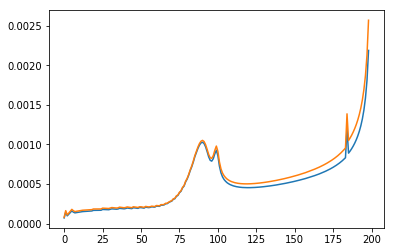

In [5]:
eigs = true_eigvals
q = QuEST.QuEST(eigs, r, gamma, k)
f,dfdl = q.Q()

deigs = np.random.uniform(low=-0.01, high=0.01, size=len(eigs))
q = QuEST.QuEST(eigs + deigs, r, gamma, k)
f2,_ = q.Q()

plt.figure()
plt.plot(f)
plt.plot(f2)
plt.figure()
plt.plot(f2 - f)
plt.plot(np.dot(dfdl,deigs))

## Invert the QuEST function using basinhopping

In [6]:
inv_quest = QuEST.inverse_quest(empirical_eigvals, r, gamma)

basinhopping step 0: f 17909.6
basinhopping step 1: f 2.27157 trial_f 2.27157 accepted 1  lowest_f 2.27157
found new global minimum on step 1 with function value 2.27157
basinhopping step 2: f 2.27157 trial_f 5.33556e+19 accepted 0  lowest_f 2.27157
basinhopping step 3: f 2.27157 trial_f 1.15711e+18 accepted 0  lowest_f 2.27157
basinhopping step 4: f 2.27157 trial_f 1.69894e+22 accepted 0  lowest_f 2.27157
basinhopping step 5: f 2.27157 trial_f 4.52419e+20 accepted 0  lowest_f 2.27157


In [7]:
inv_quest

                        fun: 2.2715735358792286
 lowest_optimization_result:      fun: 2.2715735358792286
     jac: array([-1.60242138e-01, -3.09223222e-01, -9.80258438e+00, -3.13939589e-01,
       -3.20730649e-01, -4.37330381e-02, -3.25615333e-01, -3.09126111e-01,
       -4.29267940e-01, -1.81023233e-02, -3.11890049e-01, -2.16176919e-02,
       -3.09849954e-01, -2.47600760e-02, -2.23645680e-02, -5.45536868e-03,
       -3.13622107e-01, -2.71463074e-02, -2.51285365e-02, -2.79990993e-03,
       -1.86804661e-02, -2.66328382e-02, -3.76719099e-02, -3.13598580e-01,
       -2.38080562e-02, -1.67280222e-02, -1.75649875e-02, -2.65380789e-02,
       -1.72837800e-02, -9.33585707e-01, -1.76000988e-02, -3.94137279e-03,
       -3.18918970e-01, -3.17799125e-01, -1.74818206e-02, -1.73932891e-02,
       -1.83283656e-02, -2.76909641e-02, -3.35841203e-02, -1.83653289e-02,
       -2.62600429e-02, -6.12745554e-03, -2.76805702e-02, -2.58167451e-02,
       -2.40745275e-02,  3.66841666e-02, -1.83579069e-02, -

## Plot the results

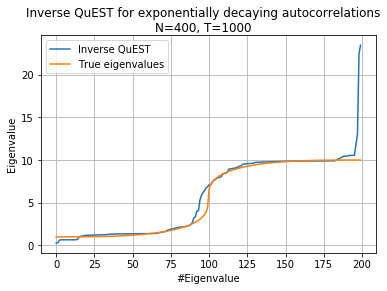

In [8]:
fig,ax = plt.subplots()
fig.suptitle("Inverse QuEST for exponentially decaying autocorrelations\nN=400, T=1000")
ax.plot(sorted(inv_quest.x), label="Inverse QuEST")
ax.plot(true_eigvals, label="True eigenvalues")
ax.set_xlabel("#Eigenvalue")
ax.set_ylabel("Eigenvalue")
ax.grid()
ax.legend()

## Compare empirical eigenvalues to QuEST calculated using true eigenvalues and the ones estimated using inverse procedure

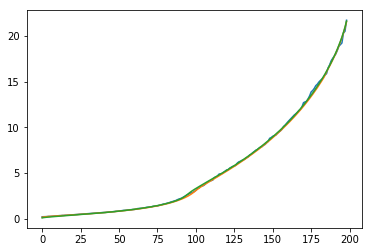

In [9]:
fig,ax = plt.subplots()
ax.plot(empirical_eigvals[:-1])
q = QuEST.QuEST(true_eigvals, r, gamma, k)
ax.plot(q.Q()[0])
q = QuEST.QuEST(inv_quest.x, r, gamma, k)
ax.plot(q.Q()[0])

## Compute square distances of empirical eigenvalues to QuEST given true eigenvalues

In [10]:
((QuEST.QuEST(true_eigvals, r, gamma, k).Q()[0] - empirical_eigvals[:-1])**2).sum()

3.374599741742658